In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB as GB 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 12\SalaryData_Test.csv")
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


<Axes: xlabel='Salary', ylabel='count'>

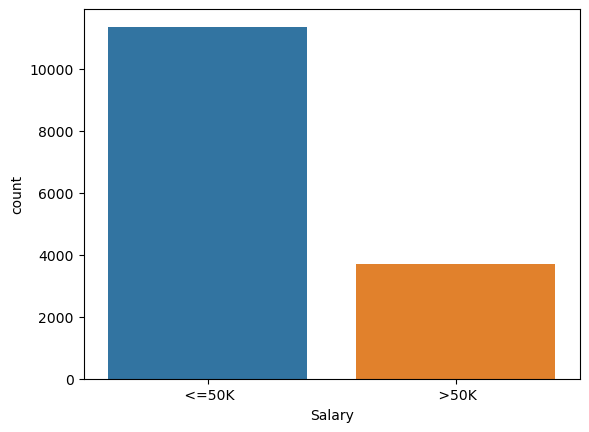

In [4]:
sns.countplot(x=data['Salary'])

In [5]:
le = LabelEncoder()
data['Salary'] = le.fit_transform(data['Salary'])
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [6]:
data = pd.get_dummies(data=data, columns= ['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])
data = data.astype(int)

In [7]:
x_train = data.drop(columns='Salary',inplace=False)
y_train = data['Salary']

In [8]:
model = GB()
model.fit(x_train,y_train)

GaussianNB()

In [13]:
pred = model.predict(x_train)
report = classification_report(y_train,pred)
print("Classification report:\n",report)

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86     11360
           1       0.57      0.81      0.67      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.81      0.77     15060
weighted avg       0.84      0.81      0.82     15060

